In this notebook, I am going to explore all the data columns and there relationship between the other data columns.

Also making the note of the observations in details.

In [1]:
# Loading all the required packages for EDA.
import pandas as pd  # Loading and working with data frame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now my next step is to load the dataset as there are two different datasets, so i will be creating two different datasets names:

1. df_training for training dataset
2. df_testing for testing dataset

In [2]:
# Loading the datasets

# Training dataset
df_training = pd.read_csv('train.csv')
df_training

# Testing dataset
df_testing = pd.read_csv('test.csv')
df_testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Once we have read the dataset now let's check the length of the DataFrame.

In [3]:
print(len(df_training))
print(len(df_testing))

891
418


Once we have check the length the we can also see the shape of the DataFrame.

In [4]:
print(f"The shape of the training dataset is {df_training.shape}")
print(f"The shape of the testing dataset is {df_testing.shape}")

The shape of the training dataset is (891, 12)
The shape of the testing dataset is (418, 11)


From the above observations we can say that one column in the testing dataset is missing and the missing column will be my traget column in the training data as shown below:

In [5]:
print(df_training.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print(df_testing.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


From the above we can see that the column name "Survived" is present in the training dataset but not present in the testing dataset as "Survived" is my target column.

If I have my target column present then it's consider to be a supervised learning.

Def: In Supervised learning the data i.e. present contains input as well as output labels. For example df_training dataframe.

Def: In Unsupervied learning the data i.e. present doesn't contain any output data. For example df_testing dataframe.

Initially I will be working with df_training -->  

In [7]:
df_training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Check the missing value in the dataframe

In [8]:
# Function for checking the missing value
def check_null_value(data):
    return data.isnull().sum()

In [9]:
check_null_value(df_training)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From my above observation we can see that three columns have missing values. Let's first deal with missing values

In [10]:
# precentage of missing values

age_missing_percentage  = check_null_value(df_training.Age)/891 * 100
print(f"The missing precentage of Age data is {age_missing_percentage .round()}")

cabin_missing_percentage  = check_null_value(df_training.Cabin)/len(df_training) * 100
print(f"The missing precentage of Cabin data is {cabin_missing_percentage .round()}")

enbarked_missing_percentage = check_null_value(df_training.Embarked)/len(df_training) * 100
print(f"The missing precentage of Embarked data is {enbarked_missing_percentage}")



The missing precentage of Age data is 20.0
The missing precentage of Cabin data is 77.0
The missing precentage of Embarked data is 0.22446689113355783


From the above obervation we can see that Cabin data have more than 50% of missing value so we can delete the column, but let's move more deeper and check the relationship between every element.

In [11]:
# checking the information of the data.
def information(data):
    return data.info()

In [12]:
print(f"The information of the data frame is {information(df_training)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
The information of the data frame is None


From the above information I can see that my data frame consists of different dtype of elements so let's deal will all those things befor checking the describe function.

From my obeservation i can see that the following columns can be deleted as shown below:

In [13]:
df_training.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [14]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


After deleting the column Our next step is to deal with categorical variable.

In [15]:
df_training['Sex'].unique()

array(['male', 'female'], dtype=object)

From the above observation we can see that there are two different categorical variable. Now let's create dummy for it.

In [16]:
df_training['Sex'] = pd.get_dummies(df_training['Sex'], drop_first=True) 

From the above code my observation is 1 --> Male and 0 --> female

# Histogram

#### Def: A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

# Creating a Histogram

To create a histogram the first step is to create bin of the ranges, then distribute the whole range of the values into a series of intervals, and count the values which fall into each of the intervals.Bins are clearly identified as consecutive, non-overlapping intervals of variables.

Link for the resource of my study is https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

In [17]:
df_training.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Count'>

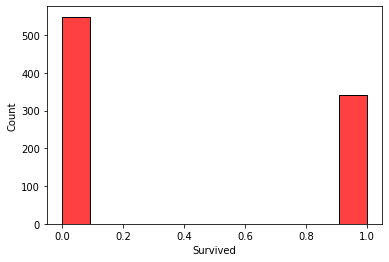

In [18]:
sns.histplot(df_training['Survived'], color=['Red'])

From my above observtion we can see that 1 represent Survived and 0 represent not survived.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

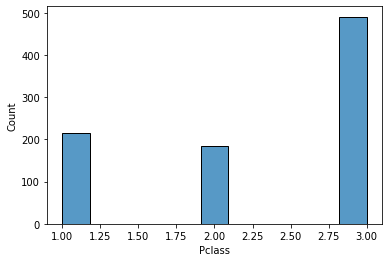

In [19]:
sns.histplot(df_training['Pclass'])

From the above observation we can see that it has 3 different classes 

1 ---> Class 1

2 ---> Class 2

3 ---> Class 3

<AxesSubplot:xlabel='Sex', ylabel='Count'>

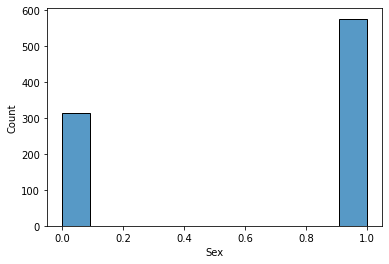

In [20]:
sns.histplot(df_training['Sex'])

From the above observation is 1 --> Male and 0 --> female

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

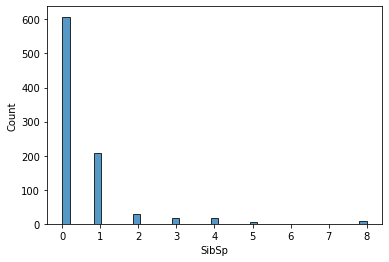

In [21]:
sns.histplot(df_training['SibSp'])

From the above observation we can see that this column represent the siblings/spouses who have boarded the ship

<AxesSubplot:xlabel='Parch', ylabel='Count'>

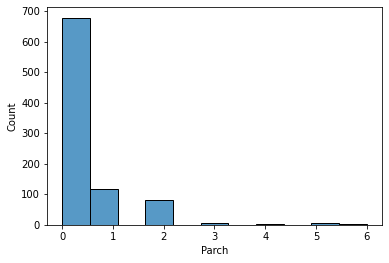

In [22]:
sns.histplot(df_training['Parch'])

This column represent the parents

As my cabin have more number of missing value we can even drop this 

In [23]:
df_training.drop(columns=['Cabin'], inplace=True, axis=1)

In [24]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


From the above observation we can see that Embarked column have text categorical variable let's deal with it.

In [25]:

df_training['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Applying map function to Embarked column

In [26]:
df_training['Embarked'] = df_training['Embarked'].map({'S':0, 'C': 1, 'Q': 2})

In [27]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,NaN,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

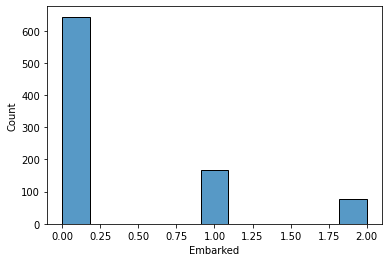

In [28]:
sns.histplot(df_training['Embarked'])

From the above obervation we can see that 

1. 0 --> Cherbourg
2. 1 --> Queenstown
3. 2 --> Southampton

Not is time to deal with all the missing values

In [29]:
check_null_value(df_training['Embarked'])

2

In [30]:
df_training['Embarked'].unique()

array([ 0.,  1.,  2., nan])

In [31]:
df_training['Age'] = df_training['Age'].fillna(df_training['Age'].median())

In [32]:
df_training['Embarked'] = df_training['Embarked'].fillna(df_training['Embarked'].mean().round(2))

In [33]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,28.0,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


In [34]:
# Final check 
check_null_value(df_training)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Once we have no missing value we can now check the relationship between the columns

In [35]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,28.0,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


# Bar plot

C:\Users\mksmu\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

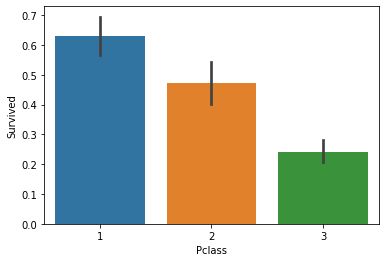

In [36]:
sns.barplot(df_training['Pclass'], df_training['Survived'])

From the above obervation we can see that class --> 1 have more survived as compare to other classes. 

C:\Users\mksmu\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

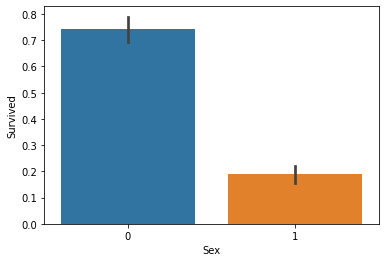

In [37]:
sns.barplot(df_training['Sex'], df_training['Survived'])

From the above observation we can see that Female have survived more as compare to male.

<AxesSubplot:xlabel='Age', ylabel='Count'>

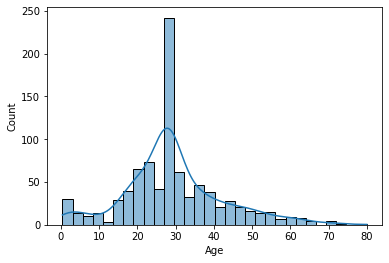

In [38]:
sns.histplot(df_training['Age'], kde=True)

The preson between the range of 20 to 40 have survived

C:\Users\mksmu\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

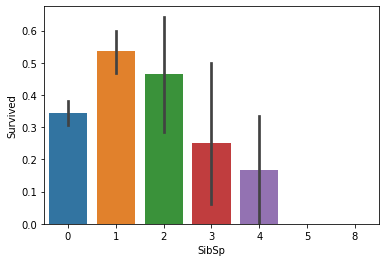

In [39]:
sns.barplot(df_training['SibSp'], df_training['Survived'])

The person who have even a single relationship they tried to survived there patnar.

C:\Users\mksmu\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

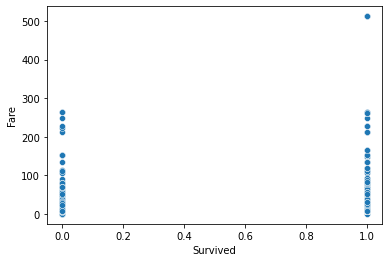

In [40]:
sns.scatterplot(df_training['Survived'],df_training['Fare'] )

Based on all the above obervation we have clear idea about the data and its relationship.

let's check the correlation between all the data.

<AxesSubplot:>

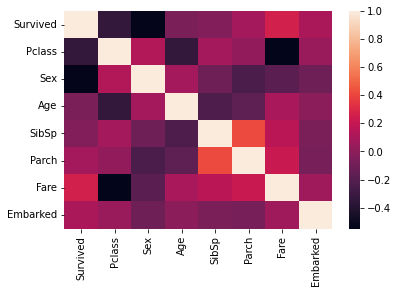

In [41]:
sns.heatmap(df_training.corr())

The altermative way of dealing with correlation matrix is VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_features = df_training.columns
# Vif calculation
vif_data['VIF'] = [variance_inflation_factor(df_training.values, i) for i in range(len(df_training.columns))]

# print
print(vif_data)

        VIF
0  1.944892
1  5.471117
2  3.624807
3  4.482789
4  1.571030
5  1.621643
6  1.923016
7  1.399080


In [43]:
!pip install statsmodels

One of the saying is that if my VIF value is more than 5 then we can ignore that column here Pclass = 5.47 as less we can ignore it.

# Now let's work with test data aswell:

In [44]:
df_testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
check_null_value(df_testing)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
# drop unrequired column in the dataset
df_testing.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [47]:
df_testing

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Transforming into numerical

In [48]:
df_testing['Sex'] = pd.get_dummies(df_testing['Sex'], drop_first=True)


In [49]:
check_null_value(df_testing)

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Embarked_transform = encoder.fit_transform(df_testing.Embarked)

In [51]:
df = pd.DataFrame(Embarked_transform )

In [52]:
df

,0
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [53]:
df.columns = ['Embarked_transform']

In [54]:
df

,Embarked_transform
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [55]:
df_testing = pd.concat([df_testing, df], axis=1)

In [56]:
df_testing.drop(['Embarked'], axis = 1, inplace = True)

In [57]:
# handling all the missing values
check_null_value(df_testing)

Pclass                 0
Sex                    0
Age                   86
SibSp                  0
Parch                  0
Fare                   1
Embarked_transform     0
dtype: int64

In [58]:
df_testing['Age'] = df_testing['Age'].fillna(df_testing['Age'].median())


In [59]:
df_testing['Fare'] = df_testing['Fare'].fillna(df_testing['Fare'].median())

once we have done all the preprocessing and featur engg. steps lets dunp the clean data

In [60]:
print(f"The missing value present in the dataset is \n {check_null_value(df_training)}")

The missing value present in the dataset is 
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [61]:
print(f"The missing value present in the dataset is \n {check_null_value(df_testing)}")

The missing value present in the dataset is 
 Pclass                0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked_transform    0
dtype: int64


One all our preprocessing step is ready let's build the model. As this is a classification based model so i am working on all the classification algorithm on df_training dataset.

# Importing all the required packages

In [62]:
df_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [63]:
x = df_training.drop(columns=['Survived'])
print(x.shape)
y = df_training['Survived']
print(y.shape)

(891, 7)
(891,)


###  spliting the data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(
        x,y,test_size=0.2, random_state=42
    )
    

In [66]:
x_train.shape

(712, 7)

In [67]:
y_train.shape

(712,)

In [68]:
print(x_test.shape)

(179, 7)


In [69]:
print(y_train.shape)

(712,)


# Logistic regression

Logistic regression, despite its name, is a classification algorithm rather than regression algorithm. Based on a given set of independent variables, it is used to estimate discrete value (0 or 1, yes/no, true/false).

Basically, it measures the relationship between the categorical dependent variable and one or more independent variables by estimating the probability of occurrence of an event using its logistics function.

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
classification_logistic = LogisticRegression(max_iter=500)
classification_logistic.fit(x_train,y_train)
predicted = classification_logistic.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predicted)
score

0.7988826815642458

Lets check all the evaluation metrics

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [74]:
confussion_matrics = confusion_matrix(y_test,predicted)
confussion_matrics

array([[89, 16],
       [20, 54]], dtype=int64)

creating a truth table

In [75]:
true_positive = confussion_matrics[0][0]
false_positive = confussion_matrics[0][1]
false_nagative = confussion_matrics[1][0]
true_nagative = confussion_matrics[1][1]

Accuracy: It help to measure the score of the model

In [76]:
accuracy = (true_positive + true_nagative) / (true_nagative + true_positive + 
                                              false_nagative + false_positive)
    

print(f"the accuracy of the model is {accuracy}")

the accuracy of the model is 0.7988826815642458


Precision : Measure all the positive value

In [77]:
precision = (true_positive) / (true_positive + false_positive)

print(f"the positive precentage of the value is {precision}")

the positive precentage of the value is 0.8476190476190476


Recall: Measure all the true value

In [78]:
recall = (true_positive) / (true_positive + false_nagative)

print(f"The true precentage of predict value is {recall}")

The true precentage of predict value is 0.8165137614678899


F1_score : combination of precision and recall

In [79]:
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"the F1_score value is {f1_score}")

the F1_score value is 0.8317757009345795


Creating a ROC curve

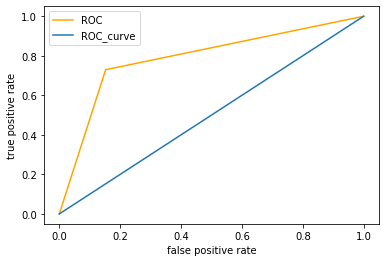

In [80]:
fpr, tpr, threshold = roc_curve(y_test, predicted)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1],label = 'ROC_curve' )
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

# Decision tree classifier

Decision Tree : Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

A decision tree for the concept PlayTennis. 

Construction of Decision Tree : 

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. Decision trees can handle high dimensional data. In general decision tree classifier has good accuracy. Decision tree induction is a typical inductive approach to learn knowledge on classification. 

Decision Tree Representation : 

Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. This process is then repeated for the subtree rooted at the new node. 

The decision tree in above figure classifies a particular morning according to whether it is suitable for playing tennis and returning the classification associated with the particular leaf.(in this case Yes or No). 

For example, the instance 

(Outlook = Rain, Temperature = Hot, Humidity = High, Wind = Strong )

 
would be sorted down the leftmost branch of this decision tree and would therefore be classified as a negative instance. 

In other words we can say that decision tree represent a disjunction of conjunctions of constraints on the attribute values of instances. 

(Outlook = Sunny ^ Humidity = Normal) v (Outlook = Overcast) v (Outlook = Rain ^ Wind = Weak) 
 

Strengths and Weakness of Decision Tree approach 

The strengths of decision tree methods are: 
 
1. Decision trees are able to generate understandable rules.
2. Decision trees perform classification without requiring much computation.
3. Decision trees are able to handle both continuous and categorical variables.
4. Decision trees provide a clear indication of which fields are most important for prediction or classification.

The weaknesses of decision tree methods : 
 
1. Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.

2. Decision trees are prone to errors in classification problems with many class and relatively small number of training examples.

3. Decision tree can be computationally expensive to train. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.


In [81]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [82]:
!pip install graphviz

In [83]:
!pip install pydotplus

In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

# parameters:

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]¶

In [85]:
feature_name = list(x.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

creating a dot file which will store the tree structure

The above code will not work in jupyter notebook but work in colab

# Evaluation

In [86]:
predicted = decision_tree.predict(x_test)
print(f"the predicted score is {predicted}")

the predicted score is [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1]


In [87]:
confussion_matrics = confusion_matrix(y_test,predicted)
confussion_matrics

true_positive = confussion_matrics[0][0]
false_positive = confussion_matrics[0][1]
false_nagative = confussion_matrics[1][0]
true_nagative = confussion_matrics[1][1]

accuracy = (true_positive + true_nagative) / (true_nagative + true_positive + 
                                              false_nagative + false_positive)
    

print(f"the accuracy of the model is {accuracy}")

precision = (true_positive) / (true_positive + false_positive)

print(f"the positive precentage of the value is {precision}")

recall = (true_positive) / (true_positive + false_nagative)

print(f"The true precentage of predict value is {recall}")

f1_score = 2 * (precision * recall) / (precision + recall)

print(f"the F1_score value is {f1_score}")



the accuracy of the model is 0.7932960893854749
the positive precentage of the value is 0.8285714285714286
The true precentage of predict value is 0.8207547169811321
the F1_score value is 0.8246445497630333


AUC and ROC

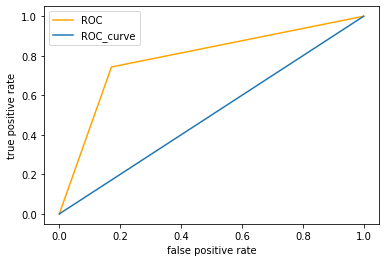

In [88]:
fpr, tpr, threshold = roc_curve(y_test, predicted)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1],label = 'ROC_curve' )
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

# Random forest classifier

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

## Parameters:

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [89]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.externals.six import StringIO

In [90]:
dt = DecisionTreeClassifier(min_samples_split=2)
dt.fit(x_train,y_train)
dt.score(x_test, y_test)

0.7821229050279329

In [97]:
random_forest = RandomForestClassifier(random_state = 6)
random_forest.fit(x_train,y_train)
random_forest.score(x_test,y_test)
predict = random_forest.predict(x_test)


# Evaluation

the accuracy of the model is 0.8156424581005587
the positive precentage of the value is 0.8380952380952381
The true precentage of predict value is 0.8461538461538461
the F1_score value is 0.8421052631578948


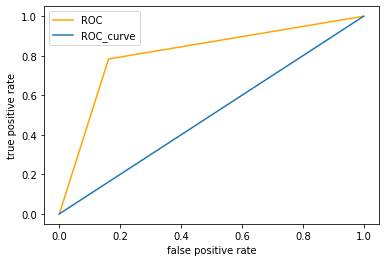

In [99]:
confussion_matrics = confusion_matrix(y_test,predict)
confussion_matrics

true_positive = confussion_matrics[0][0]
false_positive = confussion_matrics[0][1]
false_nagative = confussion_matrics[1][0]
true_nagative = confussion_matrics[1][1]

accuracy = (true_positive + true_nagative) / (true_nagative + true_positive + 
                                              false_nagative + false_positive)
    

print(f"the accuracy of the model is {accuracy}")

precision = (true_positive) / (true_positive + false_positive)

print(f"the positive precentage of the value is {precision}")

recall = (true_positive) / (true_positive + false_nagative)

print(f"The true precentage of predict value is {recall}")

f1_score = 2 * (precision * recall) / (precision + recall)

print(f"the F1_score value is {f1_score}")


fpr, tpr, threshold = roc_curve(y_test, predict)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1],label = 'ROC_curve' )
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()


# KNN and SVC

## **KNN**: 

K-nearest neighbor classifier is one of the introductory supervised classifier, which every data science learner should be aware of. Fix & Hodges proposed K-nearest neighbor classifier algorithm in the year of 1951 for performing pattern classification task.

For simplicity, this classifier is called as Knn Classifier. To be surprised k-nearest neighbor classifier mostly represented as Knn, even in many research papers too. Knn address the pattern recognition problems and also the best choices for addressing some of the classification related tasks.

The simple version of the K-nearest neighbor classifier algorithms is to predict the target label by finding the nearest neighbor class. The closest class will be identified using the distance measures like Euclidean distance.


## **SVC**:

support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

What is Support Vector Machine?

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.
In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces.

What does SVM do?

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

the accuracy of the model is 0.7150837988826816
the positive precentage of the value is 0.8476190476190476
The true precentage of predict value is 0.717741935483871
the F1_score value is 0.7772925764192139


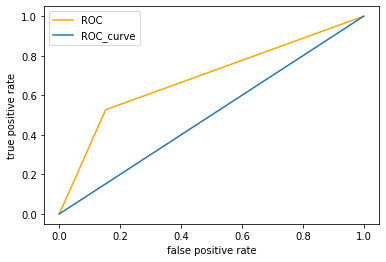

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
knn_predicted = knn_classifier.predict(x_test)
knn_predicted

# Evaluation

confussion_matrics = confusion_matrix(y_test,knn_predicted)
confussion_matrics

true_positive = confussion_matrics[0][0]
false_positive = confussion_matrics[0][1]
false_nagative = confussion_matrics[1][0]
true_nagative = confussion_matrics[1][1]

accuracy = (true_positive + true_nagative) / (true_nagative + true_positive + 
                                              false_nagative + false_positive)
    

print(f"the accuracy of the model is {accuracy}")

precision = (true_positive) / (true_positive + false_positive)

print(f"the positive precentage of the value is {precision}")

recall = (true_positive) / (true_positive + false_nagative)

print(f"The true precentage of predict value is {recall}")

f1_score = 2 * (precision * recall) / (precision + recall)

print(f"the F1_score value is {f1_score}")


fpr, tpr, threshold = roc_curve(y_test, knn_predicted)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1],label = 'ROC_curve' )
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
the accuracy of the model is 0.6536312849162011
the positive precentage of the value is 0.9428571428571428
The true precentage of predict value is 0.6387096774193548
the F1_score value is 0.7615384615384615


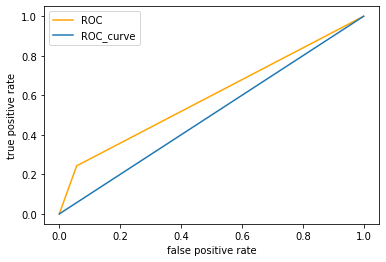

In [105]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train,y_train)
svc_predicted = svc_classifier.predict(x_test)
print(svc_predicted)

confussion_matrics = confusion_matrix(y_test,svc_predicted)
confussion_matrics

true_positive = confussion_matrics[0][0]
false_positive = confussion_matrics[0][1]
false_nagative = confussion_matrics[1][0]
true_nagative = confussion_matrics[1][1]

accuracy = (true_positive + true_nagative) / (true_nagative + true_positive + 
                                              false_nagative + false_positive)
    

print(f"the accuracy of the model is {accuracy}")

precision = (true_positive) / (true_positive + false_positive)

print(f"the positive precentage of the value is {precision}")

recall = (true_positive) / (true_positive + false_nagative)

print(f"The true precentage of predict value is {recall}")

f1_score = 2 * (precision * recall) / (precision + recall)

print(f"the F1_score value is {f1_score}")


fpr, tpr, threshold = roc_curve(y_test, svc_predicted)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1],label = 'ROC_curve' )
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()


# Naive bayes classification

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset.
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

Why is it called Naïve Bayes?

The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.

Bayes' Theorem:
Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
The formula for Bayes' theorem is given as:
Naïve Bayes Classifier Algorithm
Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.

P(A) is Prior Probability: Probability of hypothesis before observing the evidence.

P(B) is Marginal Probability: Probability of Evidence.

Working of Naïve Bayes' Classifier:
Working of Naïve Bayes' Classifier can be understood with the help of the below example:

Suppose we have a dataset of weather conditions and corresponding target variable "Play". So using this dataset we need to decide that whether we should play or not on a particular day according to the weather conditions. So to solve this problem, we need to follow the below steps:

Convert the given dataset into frequency tables.
Generate Likelihood table by finding the probabilities of given features.
Now, use Bayes theorem to calculate the posterior probability.

In [107]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(x_train,y_train)
naive_predict = naive_model.predict(x_test)
print(naive_predict)



[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1]


the accuracy of the model is 0.776536312849162
the positive precentage of the value is 0.8095238095238095
The true precentage of predict value is 0.8095238095238095
the F1_score value is 0.8095238095238095


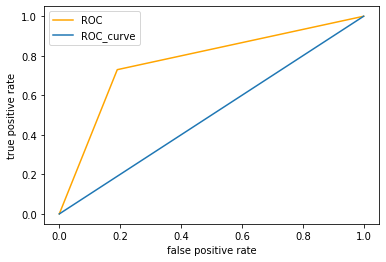

In [108]:
confussion_matrics = confusion_matrix(y_test,naive_predict)
confussion_matrics

true_positive = confussion_matrics[0][0]
false_positive = confussion_matrics[0][1]
false_nagative = confussion_matrics[1][0]
true_nagative = confussion_matrics[1][1]

accuracy = (true_positive + true_nagative) / (true_nagative + true_positive + 
                                              false_nagative + false_positive)
    

print(f"the accuracy of the model is {accuracy}")

precision = (true_positive) / (true_positive + false_positive)

print(f"the positive precentage of the value is {precision}")

recall = (true_positive) / (true_positive + false_nagative)

print(f"The true precentage of predict value is {recall}")

f1_score = 2 * (precision * recall) / (precision + recall)

print(f"the F1_score value is {f1_score}")


fpr, tpr, threshold = roc_curve(y_test, naive_predict)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1],label = 'ROC_curve' )
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()
